# 16S taxa correlation network

In [1]:
library('igraph')
library("Hmisc")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



## Quantitative abundance OTU for all wet samples

In [14]:
wet_scaled <- read.csv('otu_34taxa_scaled_wet_notp0.csv')
otu_names <- wet_scaled[,1]

In [55]:
wet_scaled_mat <- as.matrix(t(wet_scaled[,2:14]))
colnames(wet_scaled_mat) <- otu_names

In [56]:
wet_scaled_mat <- wet_scaled_mat[,-(which(colSums(wet_scaled_mat) == 0))] # exclude columns that are all 0

In [76]:
final_otus <- colnames(wet_scaled_mat)

In [64]:
#final_otus <- colnames(wet_scaled_mat)
wet_scaled_mat <- log(wet_scaled_mat+1) # log(x+1) transformation

In [65]:
cor_wet_scaled <- rcorr(wet_scaled_mat, type='pearson')

In [66]:
cor_wet_scaled$r

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
769222,1.000000000,0.51021545,0.34234557,-0.08502440,0.03290768,0.15706525,-0.046383277,-0.12641610,0.34234557,0.34234557,-0.26002623,-0.02861011,0.823213597,0.44610666,0.44610666,0.2965996,0.22524113,-0.09750740,-0.005605647,-0.10004606
556428,0.510215450,1.00000000,-0.12296464,-0.41426741,-0.43351093,0.28163668,-0.441890210,0.29753749,-0.12296464,-0.12296464,-0.12296464,-0.06520817,0.221022463,0.70970937,0.70970937,-0.1797210,-0.12296464,0.37289627,-0.179280861,-0.45227052
590579,0.342345575,-0.12296464,1.00000000,-0.19360630,-0.29379104,-0.19038873,-0.299469694,-0.42097838,1.00000000,1.00000000,-0.08333333,-0.49161122,0.420813773,-0.08333333,-0.08333333,-0.1217972,-0.08333333,-0.42499612,0.550237371,-0.30650445
922761,-0.085024397,-0.41426741,-0.19360630,1.00000000,0.77667099,-0.38977396,0.765019716,-0.46036816,-0.19360630,-0.19360630,0.19237223,0.85928903,-0.086129367,-0.46952558,-0.46952558,0.2607514,0.17959132,-0.46526409,-0.513474548,0.77419701
974121,0.032907678,-0.43351093,-0.29379104,0.77667099,1.00000000,-0.17262480,0.680270136,-0.48152357,-0.29379104,-0.29379104,0.16534490,0.75798921,0.093200322,-0.29379104,-0.29379104,0.3292771,0.20049897,-0.52088994,-0.428343542,0.94237139
574655,0.157065248,0.28163668,-0.19038873,-0.38977396,-0.17262480,1.00000000,0.034402333,0.51957586,-0.19038873,-0.19038873,0.32736144,-0.20628502,0.322244852,0.54153092,0.54153092,0.2289664,0.42143956,0.50236877,0.236527709,-0.04443801
667570,-0.046383277,-0.44189021,-0.29946969,0.76501972,0.68027014,0.03440233,1.000000000,0.01120543,-0.29946969,-0.29946969,0.39203480,0.61938562,-0.002230255,-0.29946969,-0.29946969,0.5321221,0.38772659,-0.02789254,-0.436622945,0.76018523
1051517,-0.126416100,0.29753749,-0.42097838,-0.46036816,-0.48152357,0.51957586,0.011205426,1.00000000,-0.42097838,-0.42097838,0.21952256,-0.31261980,-0.259304375,0.21881693,0.21881693,0.2394065,0.20075715,0.99011383,-0.034015019,-0.33493450
590527,0.342345575,-0.12296464,1.00000000,-0.19360630,-0.29379104,-0.19038873,-0.299469694,-0.42097838,1.00000000,1.00000000,-0.08333333,-0.49161122,0.420813773,-0.08333333,-0.08333333,-0.1217972,-0.08333333,-0.42499612,0.550237371,-0.30650445
4295826,0.342345575,-0.12296464,1.00000000,-0.19360630,-0.29379104,-0.19038873,-0.299469694,-0.42097838,1.00000000,1.00000000,-0.08333333,-0.49161122,0.420813773,-0.08333333,-0.08333333,-0.1217972,-0.08333333,-0.42499612,0.550237371,-0.30650445


In [68]:
cor_wet_scaled$P

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
769222,NA,0.074842873,0.25220984,0.7824174843,9.150093e-01,0.60833949,0.880397472,6.806833e-01,0.25220984,0.25220984,0.3909077,0.9260793134,0.0005453077,0.126518898,0.126518898,0.325098824,0.459373885,7.513198e-01,0.985499439,7.450360e-01
556428,0.0748428733,NA,0.68900391,0.1593227559,1.389043e-01,0.35123168,0.130579787,3.234979e-01,0.68900391,0.68900391,0.6890039,0.8323841491,0.4680464198,0.006579652,0.006579652,0.556855645,0.689003912,2.095156e-01,0.557838169,1.207351e-01
590579,0.2522098393,0.689003912,NA,0.5262359108,3.299192e-01,0.53326507,0.320213591,1.519943e-01,0.00000000,0.00000000,0.7866543,0.0879613803,0.1521713920,0.786654317,0.786654317,0.691825713,0.786654317,1.477137e-01,0.051367829,3.084147e-01
922761,0.7824174843,0.159322756,0.52623591,NA,1.791418e-03,0.18798782,0.002312671,1.134094e-01,0.52623591,0.52623591,0.5289271,0.0001672014,0.7796520411,0.105492478,0.105492478,0.389539891,0.557145015,1.091285e-01,0.072694188,1.893540e-03
974121,0.9150092721,0.138904286,0.32991919,0.0017914182,NA,0.57278434,0.010505037,9.569889e-02,0.32991919,0.32991919,0.5893145,0.0026800124,0.7620130393,0.329919186,0.329919186,0.271941593,0.511316118,6.796674e-02,0.144208092,1.453363e-06
574655,0.6083394913,0.351231683,0.53326507,0.1879878165,5.727843e-01,NA,0.911162421,6.878829e-02,0.53326507,0.53326507,0.2749077,0.4989398365,0.2829222445,0.055951376,0.055951376,0.451780310,0.151498916,8.019703e-02,0.436556368,8.853831e-01
667570,0.8803974719,0.130579787,0.32021359,0.0023126710,1.050504e-02,0.91116242,NA,9.710182e-01,0.32021359,0.32021359,0.1852147,0.0239729872,0.9942305967,0.320213591,0.320213591,0.061223772,0.190521594,9.279289e-01,0.135772919,2.560725e-03
1051517,0.6806832814,0.323497884,0.15199431,0.1134093523,9.569889e-02,0.06878829,0.971018150,NA,0.15199431,0.15199431,0.4711484,0.2983610002,0.3922716833,0.472611105,0.472611105,0.430827572,0.510760986,9.806556e-11,0.912159097,2.632918e-01
590527,0.2522098393,0.689003912,0.00000000,0.5262359108,3.299192e-01,0.53326507,0.320213591,1.519943e-01,NA,0.00000000,0.7866543,0.0879613803,0.1521713920,0.786654317,0.786654317,0.691825713,0.786654317,1.477137e-01,0.051367829,3.084147e-01
4295826,0.2522098393,0.689003912,0.00000000,0.5262359108,3.299192e-01,0.53326507,0.320213591,1.519943e-01,0.00000000,NA,0.7866543,0.0879613803,0.1521713920,0.786654317,0.786654317,0.691825713,0.786654317,1.477137e-01,0.051367829,3.084147e-01


In [71]:
# extract significant values: abs(r)>0.3 & P < 0.05
sig_wet_scaled <- cor_wet_scaled$r[which(abs(cor_wet_scaled$r) > 0.3 & cor_wet_scaled$P < 0.05 & lower.tri(cor_wet_scaled$r),arr.ind=TRUE)]

In [123]:
sig_wet_scaled

[1]  0.8232136  0.7097094  0.7097094  1.0000000  1.0000000  0.7766710
 [7]  0.7650197  0.8592890  0.7741970  0.6802701  0.7579892  0.9423714
[13]  0.6193856  0.7601852  0.9901138  1.0000000 -0.7167628  0.7471945
[19]  1.0000000  0.7763331

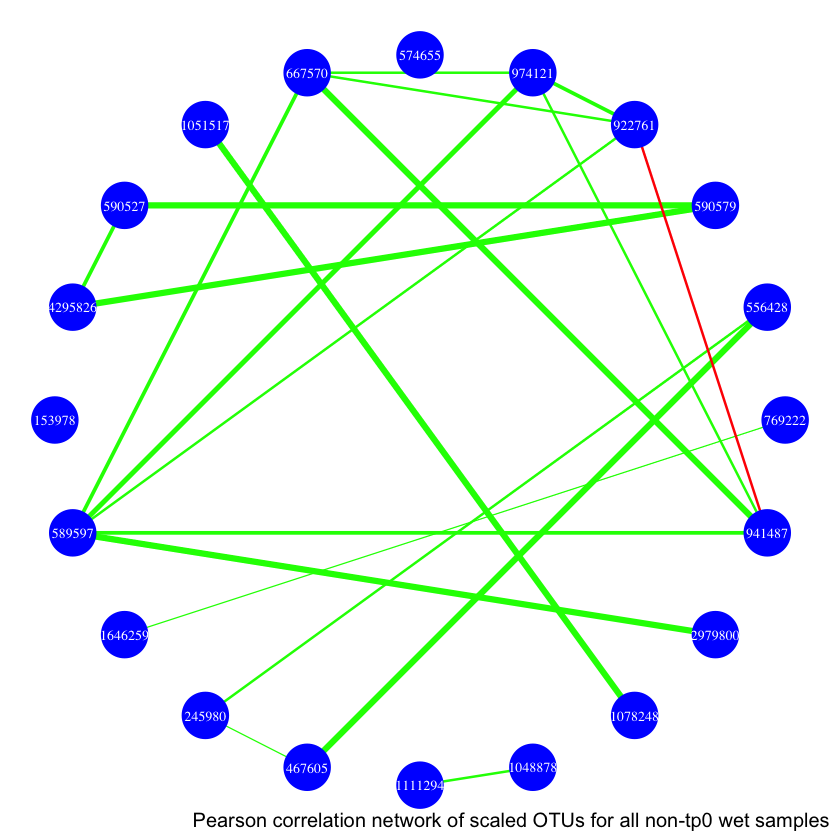

In [132]:
cor_wet_scaled$r[which(abs(cor_wet_scaled$r) <= 0.3 & lower.tri(cor_wet_scaled$r), arr.ind=TRUE)]=0
cor_wet_scaled$r[which(cor_wet_scaled$P > 0.05 & lower.tri(cor_wet_scaled$r), arr.ind=TRUE)]=0
nw_wet_scaled <- graph_from_adjacency_matrix(cor_wet_scaled$r, weighted=T, mode="lower", diag=F)
V(nw_wet_scaled)$name <- final_otus
E(nw_wet_scaled)$values <- sig_wet_scaled
E(nw_wet_scaled)$color <- ifelse(E(nw_wet_scaled)$values > 0,'#00FF00','#FF0000')
par(bg="white", mar=c(0,0,0,0))
set.seed(123)
plot(nw_wet_scaled,
     layout=layout_in_circle,
     vertex.size=13, 
     vertex.label.cex=0.7,
     vertex.color="#0000FF",
     vertex.label.color="white",
     vertex.frame.color="transparent",
     edge.width=as.integer(cut(abs(E(nw_wet_scaled)$values), breaks = 5)))
text(0.25,-1.1,"Pearson correlation network of scaled OTUs for all non-tp0 wet samples", col="black")

In [129]:
nw_wet_scaled

IGRAPH 340f4f5 UNW- 20 50 -- 
+ attr: name (v/c), weight (e/n), values (e/n), color (e/c)
+ edges from 340f4f5 (vertex names):
 [1] 769222 --556428  769222 --590579  769222 --590527  769222 --4295826
 [5] 769222 --1646259 769222 --245980  769222 --467605  556428 --245980 
 [9] 556428 --467605  556428 --1078248 590579 --590527  590579 --4295826
[13] 590579 --1646259 590579 --2979800 922761 --974121  922761 --667570 
[17] 922761 --589597  922761 --941487  974121 --667570  974121 --589597 
[21] 974121 --1111294 974121 --941487  574655 --1051517 574655 --153978 
[25] 574655 --1646259 574655 --245980  574655 --467605  574655 --1048878
[29] 574655 --1078248 667570 --153978  667570 --589597  667570 --1111294
+ ... omitted several edges

In [126]:
cor_wet_scaled$r

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
769222,1.0000000,0.5102155,0.3423456,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.3423456,0.3423456,0.0000000,0.0000000,0.8232136,0.4461067,0.4461067,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
556428,0.0000000,1.0000000,0.0000000,-0.4142674,-0.4335109,0.000000,-0.4418902,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.7097094,0.7097094,0.0000000,0.0000000,0.3728963,0.0000000,-0.4522705
590579,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.000000,0.0000000,-0.4209784,1.0000000,1.0000000,0.0000000,-0.4916112,0.4208138,0.0000000,0.0000000,0.0000000,0.0000000,-0.4249961,0.5502374,-0.3065044
922761,0.0000000,0.0000000,0.0000000,1.0000000,0.7766710,-0.389774,0.7650197,-0.4603682,0.0000000,0.0000000,0.0000000,0.8592890,0.0000000,-0.4695256,-0.4695256,0.0000000,0.0000000,-0.4652641,-0.5134745,0.7741970
974121,0.0000000,0.0000000,0.0000000,0.7766710,1.0000000,0.000000,0.6802701,-0.4815236,0.0000000,0.0000000,0.0000000,0.7579892,0.0000000,0.0000000,0.0000000,0.3292771,0.0000000,-0.5208899,-0.4283435,0.9423714
574655,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.000000,0.0000000,0.5195759,0.0000000,0.0000000,0.3273614,0.0000000,0.3222449,0.5415309,0.5415309,0.0000000,0.4214396,0.5023688,0.0000000,0.0000000
667570,0.0000000,0.0000000,0.0000000,0.7650197,0.6802701,0.000000,1.0000000,0.0000000,0.0000000,0.0000000,0.3920348,0.6193856,0.0000000,0.0000000,0.0000000,0.5321221,0.3877266,0.0000000,-0.4366229,0.7601852
1051517,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,1.0000000,-0.4209784,-0.4209784,0.0000000,-0.3126198,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.9901138,0.0000000,-0.3349345
590527,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,1.0000000,1.0000000,0.0000000,-0.4916112,0.4208138,0.0000000,0.0000000,0.0000000,0.0000000,-0.4249961,0.5502374,-0.3065044
4295826,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,1.0000000,1.0000000,0.0000000,-0.4916112,0.4208138,0.0000000,0.0000000,0.0000000,0.0000000,-0.4249961,0.5502374,-0.3065044


In [128]:
E(nw_wet_scaled)

+ 50/50 edges from 340f4f5 (vertex names):
 [1] 769222 --556428  769222 --590579  769222 --590527  769222 --4295826
 [5] 769222 --1646259 769222 --245980  769222 --467605  556428 --245980 
 [9] 556428 --467605  556428 --1078248 590579 --590527  590579 --4295826
[13] 590579 --1646259 590579 --2979800 922761 --974121  922761 --667570 
[17] 922761 --589597  922761 --941487  974121 --667570  974121 --589597 
[21] 974121 --1111294 974121 --941487  574655 --1051517 574655 --153978 
[25] 574655 --1646259 574655 --245980  574655 --467605  574655 --1048878
[29] 574655 --1078248 667570 --153978  667570 --589597  667570 --1111294
[33] 667570 --1048878 667570 --941487  1051517--1078248 590527 --4295826
[37] 590527 --1646259 590527 --2979800 4295826--1646259 4295826--2979800
+ ... omitted several edges

## Relative abundance OTU for all wet samples

In [104]:
wet_unscaled <- read.csv('otu_34taxa_unscaled_wet_notp0.csv')
otu_ids <- wet_unscaled[,1]
wet_unscaled_mat <- as.matrix(t(wet_unscaled[,2:14]))
colnames(wet_unscaled_mat) <- otu_ids
wet_unscaled_mat <- wet_unscaled_mat[,-(which(colSums(wet_unscaled_mat) == 0))] # exclude columns that are all 0

In [107]:
final_otus_unscaled <- colnames(wet_unscaled_mat)
wet_unscaled_mat <- log(wet_unscaled_mat+1) # log(x+1) transformation

In [108]:
wet_unscaled_mat

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
control.gypsum.wet.tp1,0.0000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,4.736198,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,6.298949,0.0000000,0.000000
control.gypsum.wet.tp3,2.9957323,0.6931472,0.000000,0.0000000,0.0000000,2.9957323,0.0000000,2.833213,0.000000,0.000000,0.0000000,0.6931472,1.3862944,0.6931472,0.6931472,0.0000000,0.0000000,6.045005,0.0000000,0.000000
loc1.gypsum.wet.tp2,1.0986123,0.6931472,0.000000,1.0986123,0.0000000,0.0000000,0.0000000,2.833213,0.000000,0.000000,0.0000000,1.7917595,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,5.958425,0.0000000,0.000000
control.plywood.wet.tp3,0.6931472,0.0000000,0.000000,4.4067192,1.0986123,1.6094379,3.2580965,2.564949,0.000000,0.000000,0.0000000,2.7080502,0.6931472,0.0000000,0.0000000,1.3862944,0.6931472,4.174387,0.0000000,3.044522
loc1.gypsum.wet.tp3,0.0000000,0.0000000,0.000000,6.0958246,0.0000000,0.0000000,0.6931472,2.079442,0.000000,0.000000,0.0000000,4.3174881,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,4.553877,0.0000000,0.000000
loc1.plywood.wet.tp1,3.4011974,0.0000000,1.386294,0.6931472,0.0000000,0.0000000,0.0000000,0.000000,1.386294,1.386294,0.0000000,0.0000000,2.4849066,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.6931472,0.000000
loc2.gypsum.wet.tp2,0.0000000,0.0000000,0.000000,4.8121844,0.6931472,0.0000000,1.6094379,1.386294,0.000000,0.000000,0.0000000,4.7957905,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,4.007333,0.0000000,3.135494
loc2.plywood.wet.tp2,1.3862944,0.0000000,0.000000,6.0753460,4.4773368,0.0000000,0.6931472,0.000000,0.000000,0.000000,0.0000000,4.5538769,0.6931472,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,2.397895
loc2.gypsum.wet.tp1,0.6931472,0.0000000,0.000000,5.0369526,2.3025851,0.0000000,3.1780538,2.079442,0.000000,0.000000,0.0000000,4.9052748,0.0000000,0.0000000,0.0000000,0.6931472,0.0000000,3.663562,0.0000000,1.386294
loc2.gypsum.wet.tp3,0.0000000,0.0000000,0.000000,4.4308168,0.6931472,0.6931472,3.1354942,2.639057,0.000000,0.000000,0.6931472,3.3322045,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,3.713572,0.0000000,3.044522


In [116]:
cor_wet_unscaled <- rcorr(wet_unscaled_mat, type='pearson')

In [117]:
cor_wet_unscaled$r

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
769222,1.00000000,0.4755598,0.66867486,-0.4381185,-0.11406317,0.32731428,-0.300301208,-0.220882180,0.66867486,0.66867486,-0.20225507,-0.46477224,0.92450061,0.56484916,0.56484916,-0.03439032,-0.02476386,-0.14540475,0.34447384,-0.3847886
556428,0.47555979,1.0000000,-0.12309149,-0.4841923,-0.33787513,0.43391752,-0.359740548,0.263567875,-0.12309149,-0.12309149,-0.12309149,-0.33773963,0.16860436,0.67700320,0.67700320,-0.17094086,-0.12309149,0.44186498,-0.18181818,-0.4356483
590579,0.66867486,-0.1230915,1.00000000,-0.3109261,-0.22874254,-0.16820993,-0.243545502,-0.370778967,1.00000000,1.00000000,-0.08333333,-0.39338471,0.82250834,-0.08333333,-0.08333333,-0.11572751,-0.08333333,-0.40245291,0.67700320,-0.2949353
922761,-0.43811853,-0.4841923,-0.31092614,1.0000000,0.65794023,-0.45230706,0.558719510,-0.571195774,-0.31092614,-0.31092614,0.12752956,0.88439518,-0.36778960,-0.39223733,-0.39223733,0.20740183,0.12470274,-0.54121029,-0.51932064,0.6931613
974121,-0.11406317,-0.3378751,-0.22874254,0.6579402,1.00000000,-0.32222831,0.252118162,-0.612404387,-0.22874254,-0.22874254,-0.07770560,0.67058948,-0.13153614,-0.22874254,-0.22874254,0.13622609,0.01064534,-0.67268314,-0.33787513,0.5747169
574655,0.32731428,0.4339175,-0.16820993,-0.4523071,-0.32222831,1.00000000,-0.012476203,0.415975436,-0.16820993,-0.16820993,0.04557127,-0.46396920,0.27025781,0.75573703,0.75573703,0.22596461,0.32817464,0.47767574,0.15967171,-0.1582766
667570,-0.30030121,-0.3597405,-0.24354550,0.5587195,0.25211816,-0.01247620,1.000000000,0.009062278,-0.24354550,-0.24354550,0.46789893,0.38906268,-0.24049358,-0.24354550,-0.24354550,0.68001050,0.49571743,-0.03783300,-0.35974055,0.6803189
1051517,-0.22088218,0.2635679,-0.37077897,-0.5711958,-0.61240439,0.41597544,0.009062278,1.000000000,-0.37077897,-0.37077897,0.14079937,-0.59711613,-0.30776790,0.17843629,0.17843629,0.13201533,0.12643362,0.93988210,-0.01601625,-0.4081450
590527,0.66867486,-0.1230915,1.00000000,-0.3109261,-0.22874254,-0.16820993,-0.243545502,-0.370778967,1.00000000,1.00000000,-0.08333333,-0.39338471,0.82250834,-0.08333333,-0.08333333,-0.11572751,-0.08333333,-0.40245291,0.67700320,-0.2949353
4295826,0.66867486,-0.1230915,1.00000000,-0.3109261,-0.22874254,-0.16820993,-0.243545502,-0.370778967,1.00000000,1.00000000,-0.08333333,-0.39338471,0.82250834,-0.08333333,-0.08333333,-0.11572751,-0.08333333,-0.40245291,0.67700320,-0.2949353


In [118]:
cor_wet_unscaled$P

,769222,556428,590579,922761,974121,574655,667570,1051517,590527,4295826,153978,589597,1646259,245980,467605,1111294,1048878,1078248,2979800,941487
769222,NA,0.10048573,0.0124609556,1.342848e-01,0.71061047,0.274980989,0.31880598,4.683361e-01,0.0124609556,0.0124609556,0.5075454,1.095536e-01,6.199942e-06,0.044288520,0.044288520,9.111933e-01,9.359973e-01,6.355201e-01,0.24907966,0.194194974
556428,1.004857e-01,NA,0.6886975361,9.360826e-02,0.25886079,0.138492491,0.22731065,3.842515e-01,0.6886975361,0.6886975361,0.6886975,2.590640e-01,5.818901e-01,0.011030721,0.011030721,5.765912e-01,6.886975e-01,1.306043e-01,0.55218379,0.136748517
590579,1.246096e-02,0.68869754,NA,3.011264e-01,0.45223489,0.582786566,0.42265692,2.123194e-01,0.0000000000,0.0000000000,0.7866543,1.835713e-01,5.565781e-04,0.786654317,0.786654317,7.065549e-01,7.866543e-01,1.727713e-01,0.01103072,0.327950478
922761,1.342848e-01,0.09360826,0.3011264159,NA,0.01450572,0.120701339,0.04716675,4.144403e-02,0.3011264159,0.3011264159,0.6780060,5.965384e-05,2.163173e-01,0.184967526,0.184967526,4.965668e-01,6.848097e-01,5.612553e-02,0.06894865,0.008613774
974121,7.106105e-01,0.25886079,0.4522348933,1.450572e-02,NA,0.282948375,0.40598415,2.608471e-02,0.4522348933,0.4522348933,0.8007926,1.212043e-02,6.684014e-01,0.452234893,0.452234893,6.572174e-01,9.724663e-01,1.175615e-02,0.25886079,0.039924112
574655,2.749810e-01,0.13849249,0.5827865658,1.207013e-01,0.28294838,NA,0.96773285,1.574363e-01,0.5827865658,0.5827865658,0.8824782,1.102499e-01,3.718419e-01,0.002806792,0.002806792,4.578944e-01,2.736463e-01,9.876910e-02,0.60232514,0.605541383
667570,3.188060e-01,0.22731065,0.4226569208,4.716675e-02,0.40598415,0.967732852,NA,9.765597e-01,0.4226569208,0.4226569208,0.1068706,1.888657e-01,4.286741e-01,0.422656921,0.422656921,1.054611e-02,8.493909e-02,9.023396e-01,0.22731065,0.010497332
1051517,4.683361e-01,0.38425150,0.2123193545,4.144403e-02,0.02608471,0.157436322,0.97655969,NA,0.2123193545,0.2123193545,0.6463745,3.118434e-02,3.063221e-01,0.559725603,0.559725603,6.672557e-01,6.806411e-01,1.825068e-06,0.95858350,0.166204477
590527,1.246096e-02,0.68869754,0.0000000000,3.011264e-01,0.45223489,0.582786566,0.42265692,2.123194e-01,NA,0.0000000000,0.7866543,1.835713e-01,5.565781e-04,0.786654317,0.786654317,7.065549e-01,7.866543e-01,1.727713e-01,0.01103072,0.327950478
4295826,1.246096e-02,0.68869754,0.0000000000,3.011264e-01,0.45223489,0.582786566,0.42265692,2.123194e-01,0.0000000000,NA,0.7866543,1.835713e-01,5.565781e-04,0.786654317,0.786654317,7.065549e-01,7.866543e-01,1.727713e-01,0.01103072,0.327950478


In [119]:
sig_wet_unscaled <- cor_wet_unscaled$r[which(abs(cor_wet_unscaled$r) > 0.3 & cor_wet_unscaled$P < 0.05 & lower.tri(cor_wet_unscaled$r),arr.ind=TRUE)]

In [120]:
sig_wet_unscaled

[1]  0.6686749  0.6686749  0.6686749  0.9245006  0.5648492  0.5648492
 [7]  0.6770032  0.6770032  1.0000000  1.0000000  0.8225083  0.6770032
[13]  0.6579402  0.5587195 -0.5711958  0.8843952  0.6931613 -0.6124044
[19]  0.6705895 -0.6726831  0.5747169  0.7557370  0.7557370  0.6800105
[25]  0.6803189 -0.5971161  0.9398821  1.0000000  0.8225083  0.6770032
[31]  0.8225083  0.6770032 -0.5810677  0.6729695  1.0000000  0.8872443

In [121]:
final_otus_unscaled

[1] "769222"  "556428"  "590579"  "922761"  "974121"  "574655"  "667570" 
 [8] "1051517" "590527"  "4295826" "153978"  "589597"  "1646259" "245980" 
[15] "467605"  "1111294" "1048878" "1078248" "2979800" "941487"

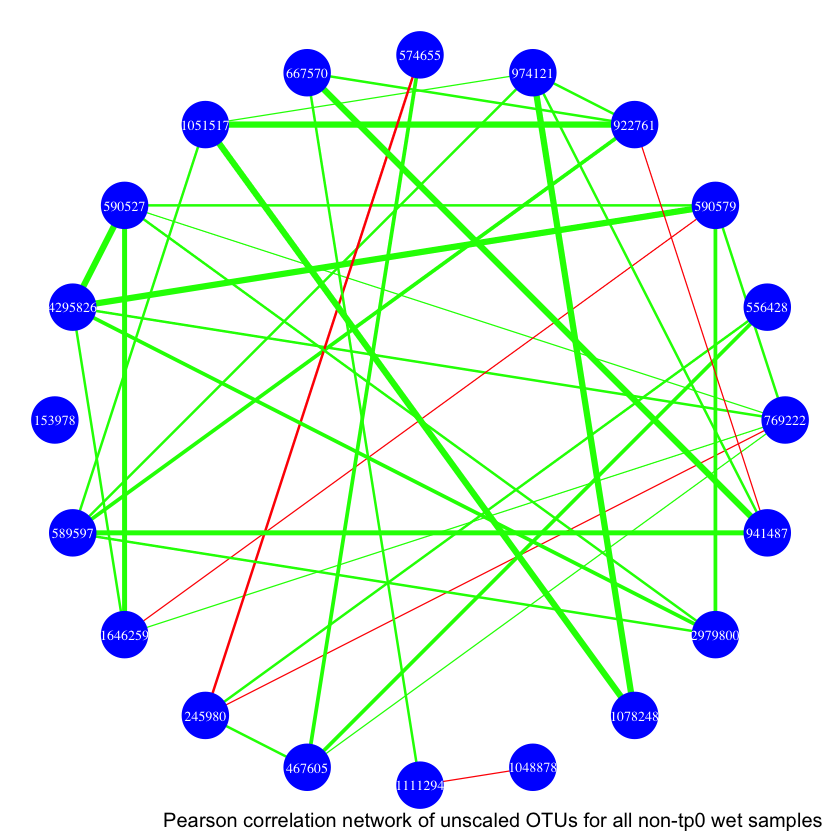

In [133]:
cor_wet_unscaled$r[which(abs(cor_wet_unscaled$r) <= 0.3 & lower.tri(cor_wet_unscaled$r), arr.ind=TRUE)]=0
cor_wet_unscaled$r[which(cor_wet_unscaled$P > 0.05 & lower.tri(cor_wet_unscaled$r), arr.ind=TRUE)]=0
nw_wet_unscaled <- graph_from_adjacency_matrix(cor_wet_unscaled$r, weighted=T, mode="lower", diag=F)
V(nw_wet_unscaled)$name <- final_otus_unscaled
E(nw_wet_unscaled)$values <- sig_wet_unscaled
E(nw_wet_unscaled)$color <- ifelse(E(nw_wet_unscaled)$values > 0,'#00FF00','#FF0000')
par(bg="white", mar=c(0,0,0,0))
set.seed(123)
plot(nw_wet_unscaled,
     layout=layout_in_circle,
     vertex.size=13, 
     vertex.label.cex=0.7,
     vertex.color="#0000FF",
     vertex.label.color="white",
     vertex.frame.color="transparent",
     edge.width=as.integer(cut(abs(E(nw_wet_unscaled)$values), breaks = 5)))
text(0.2,-1.1,"Pearson correlation network of unscaled OTUs for all non-tp0 wet samples", col="black")

## Quantitative abundance OTU for all dry samples

In [6]:
dry_scaled <- read.csv('otu_34taxa_scaled_dry_notp0.csv')
otu_ids_dry_scaled <- dry_scaled[,1]
dry_scaled_mat <- as.matrix(t(dry_scaled[,2:26]))
colnames(dry_scaled_mat) <- otu_ids_dry_scaled
#dry_scaled_mat <- dry_scaled_mat[,-(which(colSums(dry_scaled_mat) == 0))] # exclude columns that are all 0

In [7]:
dry_scaled_mat

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
control.gypsum.dry.tp1,9130.4920,0.00000,294.5320,2145.876,336.6080,0.0000,799.44400,0.00000,0.00000,84.1520,⋯,673.2160,0.00000,294.53200,336.60800,0.0000,0.0000,0.0000,0.00000,0.00000,0.000
control.gypsum.dry.tp2,990006.2041,0.00000,22500.1410,27500.172,82500.5170,0.0000,0.00000,2500.01567,22500.14100,0.0000,⋯,35000.2193,15000.09400,0.00000,7500.04700,80000.5013,0.0000,0.0000,25000.15667,0.00000,0.000
control.mdf.dry.tp1,14138.4126,0.00000,890.6087,0.000,0.0000,0.0000,8683.43450,0.00000,2894.47817,0.0000,⋯,0.0000,1113.26083,0.00000,2783.15208,0.0000,890.6087,0.0000,3339.78250,0.00000,0.000
control.plywood.dry.tp2,0.0000,0.00000,0.0000,12401.901,8956.9285,0.0000,22047.82400,0.00000,0.00000,0.0000,⋯,13779.8900,0.00000,0.00000,344.49725,0.0000,0.0000,0.0000,19980.84050,0.00000,0.000
control.mdf.dry.tp3,121948.5202,0.00000,7461.4773,0.000,0.0000,0.0000,0.00000,233.17117,8860.50433,0.0000,⋯,0.0000,1399.02700,0.00000,0.00000,0.0000,0.0000,0.0000,0.00000,0.00000,0.000
control.mdf.dry.tp2,115774.7438,0.00000,2958.4688,2958.469,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,⋯,0.0000,2958.46875,0.00000,197.23125,0.0000,0.0000,0.0000,986.15625,0.00000,0.000
control.plywood.dry.tp1,3644.8335,0.00000,0.0000,0.000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,⋯,284.0130,1104.49500,0.00000,189.34200,0.0000,0.0000,47.3355,0.00000,0.00000,0.000
control.plywood.dry.tp3,21052.0253,2265.09133,3131.1557,0.000,1065.9253,0.0000,0.00000,133.24067,6062.45033,0.0000,⋯,0.0000,0.00000,0.00000,2864.67433,0.0000,0.0000,0.0000,0.00000,0.00000,0.000
loc1.gypsum.dry.tp1,5901.1590,238.43067,0.0000,0.000,178.8230,3338.0293,0.00000,0.00000,0.00000,774.8997,⋯,0.0000,894.11500,298.03833,417.25367,417.2537,715.2920,3874.4983,0.00000,298.03833,0.000
loc1.gypsum.dry.tp3,58485.6400,0.00000,631.1400,0.000,0.0000,1157.0900,0.00000,525.95000,105.19000,1051.9000,⋯,0.0000,1683.04000,0.00000,0.00000,105.1900,0.0000,1577.8500,0.00000,0.00000,0.000


In [8]:
dry_scaled_mat <- log(dry_scaled_mat+1)

In [9]:
dry_scaled_mat

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
control.gypsum.dry.tp1,9.119484,0.000000,5.688777,7.671769,5.821885,0.000000,6.685167,0.000000,0.000000,4.444438,⋯,6.513551,0.000000,5.688777,5.821885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
control.gypsum.dry.tp2,13.805467,0.000000,10.021321,10.221984,11.320572,0.000000,0.000000,7.824452,10.021321,0.000000,⋯,10.463138,9.615878,0.000000,8.922798,11.289801,0.000000,0.000000,10.126677,0.000000,0.000000
control.mdf.dry.tp1,9.556721,0.000000,6.793027,0.000000,0.000000,0.000000,9.069288,0.000000,7.970906,0.000000,⋯,0.000000,7.015947,0.000000,7.931699,0.000000,6.793027,0.000000,8.113960,0.000000,0.000000
control.plywood.dry.tp2,0.000000,0.000000,0.000000,9.425686,9.100294,0.000000,10.001015,0.000000,0.000000,0.000000,⋯,9.531038,0.000000,0.000000,5.844985,0.000000,0.000000,0.000000,9.902579,0.000000,0.000000
control.mdf.dry.tp3,11.711362,0.000000,8.917643,0.000000,0.000000,0.000000,0.000000,5.456052,9.089472,0.000000,⋯,0.000000,7.244247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
control.mdf.dry.tp2,11.659410,0.000000,7.992765,7.992765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,7.992765,0.000000,5.289434,0.000000,0.000000,0.000000,6.894828,0.000000,0.000000
control.plywood.dry.tp1,8.201340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,5.652535,7.008048,0.000000,5.248822,0.000000,0.000000,3.878166,0.000000,0.000000,0.000000
control.plywood.dry.tp3,9.954800,7.725812,8.049477,0.000000,6.972536,0.000000,0.000000,4.899634,8.710034,0.000000,⋯,0.000000,0.000000,0.000000,7.960559,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
loc1.gypsum.dry.tp1,8.683073,5.478264,0.000000,0.000000,5.191973,8.113435,0.000000,0.000000,0.000000,6.654023,⋯,0.000000,6.796952,5.700572,6.036088,6.036088,6.574088,8.262430,0.000000,5.700572,0.000000
loc1.gypsum.dry.tp3,10.976554,0.000000,6.449111,0.000000,0.000000,7.054527,0.000000,6.267106,4.665230,6.959304,⋯,0.000000,7.428951,0.000000,0.000000,4.665230,0.000000,7.364452,0.000000,0.000000,0.000000


In [10]:
cor_dry_scaled <- rcorr(dry_scaled_mat, type='pearson')

In [11]:
cor_dry_scaled$r

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
769222,1.00000000,-0.027774721,0.497001818,0.01864548,-0.18794573,0.096055327,-0.42377675,0.306277184,0.42319471,0.088048708,⋯,-0.23174086,0.56361463,-0.11595081,0.16529241,0.34291187,0.06943361,0.088756322,-0.089977180,-0.042389696,-0.06177097
1101451,-0.02777472,1.000000000,0.003908222,-0.13193734,0.59591734,0.487479844,-0.16005638,0.385204581,-0.15525432,0.154101806,⋯,-0.29540708,0.06173467,0.75029044,-0.14065381,0.23579297,0.28581092,0.256481132,0.094356716,0.498996508,0.63947296
556428,0.49700182,0.003908222,1.000000000,0.29743365,0.08305863,0.008428706,-0.15869713,0.389341636,0.45038216,-0.222367243,⋯,-0.10690930,0.33003626,-0.12502624,0.27656312,0.29547334,0.07779284,0.052461775,0.222619243,-0.057519444,-0.21785378
590579,0.01864548,-0.131937342,0.297433654,1.00000000,0.40132055,-0.122500104,0.33158344,-0.082947134,-0.02729897,-0.232687326,⋯,0.55726687,0.03733124,0.03332727,0.49648776,0.17950271,0.22771511,0.058103798,0.645825936,-0.131027663,-0.14609569
922761,-0.18794573,0.595917338,0.083058629,0.40132055,1.00000000,0.224358655,0.14102904,0.358962668,-0.14538697,0.035005706,⋯,0.40039203,-0.09428408,0.54719273,0.18790872,0.46015240,0.13441707,0.102957005,0.454802929,0.202959289,0.35537293
1084865,0.09605533,0.487479844,0.008428706,-0.12250010,0.22435866,1.000000000,0.04729180,0.507731283,-0.14208285,0.527097021,⋯,-0.13433898,0.30046054,0.42812006,-0.28369973,0.41574636,0.44919262,0.695201202,-0.028288629,0.344316710,0.35202667
4310452,-0.42377675,-0.160056375,-0.158697130,0.33158344,0.14102904,0.047291799,1.00000000,-0.271953869,-0.31890402,-0.025961492,⋯,0.55392828,-0.35278110,0.07565881,0.26492482,-0.32467663,0.29679170,0.077666878,0.422633192,-0.093896565,-0.12142552
974121,0.30627718,0.385204581,0.389341636,-0.08294713,0.35896267,0.507731283,-0.27195387,1.000000000,0.27459058,0.120489710,⋯,-0.12043386,0.23080600,0.11967947,-0.22184974,0.62289579,0.15341571,0.334465686,0.008247352,-0.066526154,0.12994914
574655,0.42319471,-0.155254324,0.450382163,-0.02729897,-0.14538697,-0.142082848,-0.31890402,0.274590578,1.00000000,-0.175658643,⋯,-0.24401258,0.13639345,-0.46694153,0.04069116,0.14872691,-0.09885659,-0.252108019,-0.123421537,-0.191388473,-0.15250619
988314,0.08804871,0.154101806,-0.222367243,-0.23268733,0.03500571,0.527097021,-0.02596149,0.120489710,-0.17565864,1.000000000,⋯,0.02600319,0.23265913,0.32422350,-0.35393870,0.21950979,-0.02724238,0.136486557,-0.138989271,0.254542677,0.19804201


In [12]:
cor_dry_scaled$P

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
769222,NA,8.951513e-01,0.01148770,0.9295095509,0.368294390,0.6478529595,0.034767900,0.1364772592,0.03504444,0.675567557,⋯,0.265004020,0.003346253,5.809893e-01,0.429758809,9.332731e-02,7.415566e-01,6.731009e-01,6.688529e-01,0.840551937,7.692755e-01
1101451,8.951513e-01,NA,0.98520752,0.5295644569,0.001670047,0.0134454491,0.444713703,0.0572308872,0.45866879,0.462051811,⋯,0.151674359,0.769407495,1.565883e-05,0.502468824,2.565024e-01,1.660575e-01,2.158714e-01,6.536962e-01,0.011109045,5.781048e-04
556428,1.148770e-02,9.852075e-01,NA,0.1487537840,0.693053298,0.9681038856,0.448640652,0.0543877503,0.02386718,0.285357002,⋯,0.611003529,0.107132662,5.515286e-01,0.180799140,1.515782e-01,7.116719e-01,8.033214e-01,2.847973e-01,0.784776911,2.954992e-01
590579,9.295096e-01,5.295645e-01,0.14875378,NA,0.046772017,0.5596597852,0.105398404,0.6934457744,0.89693783,0.263002251,⋯,0.003805088,0.859381588,8.743396e-01,0.011586990,3.905783e-01,2.736277e-01,7.826414e-01,4.885481e-04,0.532431605,4.859069e-01
922761,3.682944e-01,1.670047e-03,0.69305330,0.0467720167,NA,0.2809528019,0.501317956,0.0780359128,0.48804808,0.868063919,⋯,0.047330599,0.653946541,4.642265e-03,0.368390438,2.063871e-02,5.217862e-01,6.243215e-01,2.235922e-02,0.330543361,8.127807e-02
1084865,6.478530e-01,1.344545e-02,0.96810389,0.5596597852,0.280952802,NA,0.822385058,0.0095704537,0.49809287,0.006781758,⋯,0.522030301,0.144466536,3.275877e-02,0.169346074,3.874020e-02,2.428669e-02,1.146616e-04,8.932221e-01,0.091905744,8.439121e-02
4310452,3.476790e-02,4.447137e-01,0.44864065,0.1053984043,0.501317956,0.8223850580,NA,0.1884751282,0.12023785,0.901962827,⋯,0.004067068,0.083681607,7.192640e-01,0.200607655,1.133035e-01,1.496746e-01,7.121193e-01,3.531288e-02,0.655282595,5.631350e-01
974121,1.364773e-01,5.723089e-02,0.05438775,0.6934457744,0.078035913,0.0095704537,0.188475128,NA,0.18405713,0.566169346,⋯,0.566350682,0.266990848,5.688024e-01,0.286508605,8.817608e-04,4.640719e-01,1.022232e-01,9.687898e-01,0.752039324,5.358404e-01
574655,3.504444e-02,4.586688e-01,0.02386718,0.8969378292,0.488048076,0.4980928742,0.120237849,0.1840571323,NA,0.400971648,⋯,0.239805445,0.515626315,1.861175e-02,0.846865635,4.779991e-01,6.382607e-01,2.240755e-01,5.566876e-01,0.359424429,4.667568e-01
988314,6.755676e-01,4.620518e-01,0.28535700,0.2630022510,0.868063919,0.0067817582,0.901962827,0.5661693465,0.40097165,NA,⋯,0.901806104,0.263061748,1.138370e-01,0.082601566,2.917522e-01,8.971503e-01,5.153370e-01,5.075897e-01,0.219482743,3.426411e-01


In [13]:
sig_dry_scaled <- cor_dry_scaled$r[which(abs(cor_dry_scaled$r) > 0.3 & cor_dry_scaled$P < 0.05 & lower.tri(cor_dry_scaled$r),arr.ind=TRUE)]

In [20]:
sig_dry_scaled

[1]  0.4970018 -0.4237768  0.4231947  0.3987847 -0.4262142  0.7549838
  [7]  0.7103949  0.7476443  0.5636146  0.5959173  0.4874798  0.6084792
 [13]  0.3969364  0.5488413  0.6327113  0.7502904  0.4989965  0.6394730
 [19]  0.4503822  0.4168014  0.4013206  0.4244692  0.6914626  0.5572669
 [25]  0.4964878  0.6458259  0.4598878  0.5071440  0.4003920  0.5471927
 [31]  0.4601524  0.4548029  0.5077313  0.5270970  0.5176827  0.5643345
 [37]  0.5476126  0.4281201  0.4157464  0.4491926  0.6952012  0.4010592
 [43]  0.5177167  0.4565385 -0.4637836  0.5539283  0.4226332  0.6228958
 [49] -0.4697835  0.5202094  0.4508749 -0.4669415  0.4232110  0.4984295
 [55]  0.4635907  0.4471328  0.7681265  0.4542438  0.5780718  0.4939823
 [61]  0.5888824  0.4210301  0.7165523 -0.4841802  0.5472788  0.7762762
 [67]  0.6178376  0.6855518 -0.4103213  0.5602756  0.8073254  0.7162499
 [73]  0.4151367  0.7467682 -0.4473761 -0.4592545  0.4466116  0.5118275
 [79]  0.5600531  0.5449159  0.4919939  0.5100034  0.5406160  0.6306410
 [85]  0.5939568  0.8344401  0.7608791  0.7719187  0.6876193 -0.5085177
 [91]  0.4857207  0.6441172  0.4195021  0.4443566  0.5499779  0.6683028
 [97] -0.4605145  0.4359410  0.6442352  0.5464925

In [18]:
length(otu_ids_dry_scaled)

[1] 34

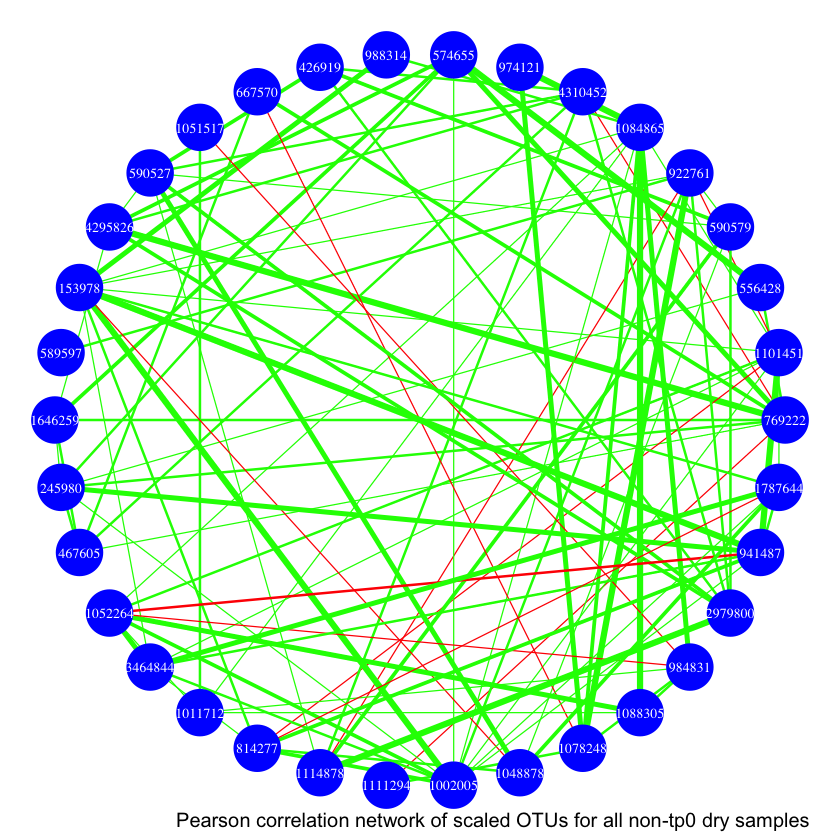

In [19]:
cor_dry_scaled$r[which(abs(cor_dry_scaled$r) <= 0.3 & lower.tri(cor_dry_scaled$r), arr.ind=TRUE)]=0
cor_dry_scaled$r[which(cor_dry_scaled$P >= 0.05 & lower.tri(cor_dry_scaled$r), arr.ind=TRUE)]=0
nw_dry_scaled <- graph_from_adjacency_matrix(cor_dry_scaled$r, weighted=T, mode="lower", diag=F)
V(nw_dry_scaled)$name <- otu_ids_dry_scaled
E(nw_dry_scaled)$values <- sig_dry_scaled
E(nw_dry_scaled)$color <- ifelse(E(nw_dry_scaled)$values > 0,'#00FF00','#FF0000')
par(bg="white", mar=c(0,0,0,0))
set.seed(123)
plot(nw_dry_scaled,
     layout=layout_in_circle,
     vertex.size=13, 
     vertex.label.cex=0.7,
     vertex.color="#0000FF",
     vertex.label.color="white",
     vertex.frame.color="transparent",
     edge.width=as.integer(cut(abs(E(nw_dry_scaled)$values), breaks = 5)))
text(0.2,-1.1,"Pearson correlation network of scaled OTUs for all non-tp0 dry samples", col="black")

## Relative abundance OTU for all dry samples

In [24]:
dry_unscaled <- read.csv('otu_34taxa_unscaled_dry_notp0.csv')
otu_ids_dry_unscaled <- dry_unscaled[,1]
dry_unscaled_mat <- as.matrix(t(dry_unscaled[,2:26]))
colnames(dry_unscaled_mat) <- otu_ids_dry_unscaled

In [25]:
dry_unscaled_mat

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
control.gypsum.dry.tp1,217,0,7,51,8,0,19,0,0,2,⋯,16,0,7,8,0,0,0,0,0,0
control.gypsum.dry.tp2,396,0,9,11,33,0,0,1,9,0,⋯,14,6,0,3,32,0,0,10,0,0
control.mdf.dry.tp1,127,0,8,0,0,0,78,0,26,0,⋯,0,10,0,25,0,8,0,30,0,0
control.plywood.dry.tp2,0,0,0,36,26,0,64,0,0,0,⋯,40,0,0,1,0,0,0,58,0,0
control.mdf.dry.tp3,523,0,32,0,0,0,0,1,38,0,⋯,0,6,0,0,0,0,0,0,0,0
control.mdf.dry.tp2,587,0,15,15,0,0,0,0,0,0,⋯,0,15,0,1,0,0,0,5,0,0
control.plywood.dry.tp1,231,0,0,0,0,0,0,0,0,0,⋯,18,70,0,12,0,0,3,0,0,0
control.plywood.dry.tp3,316,34,47,0,16,0,0,2,91,0,⋯,0,0,0,43,0,0,0,0,0,0
loc1.gypsum.dry.tp1,99,4,0,0,3,56,0,0,0,13,⋯,0,15,5,7,7,12,65,0,5,0
loc1.gypsum.dry.tp3,556,0,6,0,0,11,0,5,1,10,⋯,0,16,0,0,1,0,15,0,0,0


In [26]:
dry_unscaled_mat <- log(dry_unscaled_mat+1)

In [28]:
cor_dry_unscaled <- rcorr(dry_unscaled_mat, type='pearson')

In [29]:
cor_dry_unscaled$r

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
769222,1.0000000000,-0.17271325,0.395975111,-0.132380899,-0.41196316,-0.0002243526,-0.284112534,0.092226815,0.32229255,0.01398849,⋯,-0.241452697,0.355337369,-0.352844996,0.299729099,0.091579495,0.02388325,0.106341605,-0.332517986,-0.19506254,-0.44197266
1101451,-0.1727132513,1.00000000,0.098969705,-0.242527779,0.49994918,0.3536656213,-0.330579525,0.533484361,0.10409831,0.11220089,⋯,-0.403739485,-0.093867536,0.497409916,0.082335679,0.196417983,0.29108421,0.185613899,-0.158462129,0.36213201,0.32524272
556428,0.3959751109,0.09896970,1.000000000,0.256877228,0.03624324,-0.0945643184,-0.002918034,0.284357813,0.49297442,-0.37788927,⋯,-0.182296935,0.047276781,-0.268788625,0.357406773,0.152995685,0.15003352,0.066352648,0.138422365,-0.09700445,-0.38326702
590579,-0.1323808993,-0.24252778,0.256877228,1.000000000,0.36424690,-0.1415730034,0.418362653,-0.195883089,-0.20129620,-0.23009703,⋯,0.552455468,-0.221711639,-0.031743105,0.123218993,0.078491526,0.13414854,-0.006026287,0.562657446,-0.07448234,-0.21564429
922761,-0.4119631597,0.49994918,0.036243239,0.364246898,1.00000000,0.1819259023,0.153741832,0.317242630,-0.13197623,-0.03837375,⋯,0.382918853,-0.393068503,0.421766406,0.078992689,0.414231874,0.15582255,0.136938681,0.284968919,0.11914328,0.12517369
1084865,-0.0002243526,0.35366562,-0.094564318,-0.141573003,0.18192590,1.0000000000,0.009905805,0.510127187,-0.21981542,0.49841257,⋯,-0.125177179,0.349909439,0.373812777,-0.230111962,0.267648287,0.46667432,0.725236509,0.081030478,0.26734987,0.07938567
4310452,-0.2841125341,-0.33057953,-0.002918034,0.418362653,0.15374183,0.0099058046,1.000000000,-0.292122349,-0.14459020,-0.15046890,⋯,0.540033891,-0.257452818,-0.006350966,0.281340570,-0.350821830,0.18936495,-0.048123721,0.641121781,-0.03422533,-0.23083470
974121,0.0922268151,0.53348436,0.284357813,-0.195883089,0.31724263,0.5101271874,-0.292122349,1.000000000,0.08537665,0.01054740,⋯,-0.325222704,0.166944337,0.180825337,-0.186370228,0.473323037,0.33858163,0.497865146,-0.088914948,-0.05597283,0.09213734
574655,0.3222925475,0.10409831,0.492974417,-0.201296196,-0.13197623,-0.2198154207,-0.144590198,0.085376647,1.00000000,-0.11928167,⋯,-0.319922692,-0.054279391,-0.458389698,0.230806127,0.034344961,-0.01033515,-0.285678325,-0.106208737,-0.30125516,-0.26620933
988314,0.0139884874,0.11220089,-0.377889265,-0.230097025,-0.03837375,0.4984125657,-0.150468903,0.010547400,-0.11928167,1.00000000,⋯,-0.093022436,0.236012615,0.327272404,-0.254896752,0.053323829,0.04128368,0.223536624,-0.291297433,0.17915702,0.03473748


In [30]:
cor_dry_unscaled$P

,769222,1101451,556428,590579,922761,1084865,4310452,974121,574655,988314,⋯,1114878,1111294,1002005,1048878,1078248,1088305,984831,2979800,941487,1787644
769222,NA,0.409038937,0.050059724,0.5281691043,0.040732113,9.991508e-01,0.1686995088,0.661051202,0.11613085,0.94708750,⋯,2.449268e-01,0.08131070,0.0836217141,0.145494356,0.663292630,9.097781e-01,6.129092e-01,0.104360966,0.350098013,2.696245e-02
1101451,4.090389e-01,NA,0.637874580,0.2427673347,0.010931880,8.285539e-02,0.1065213229,0.006026881,0.62046368,0.59335939,⋯,4.534111e-02,0.65538272,0.0114093708,0.695599543,0.346693818,1.580399e-01,3.743737e-01,0.449321441,0.075255920,1.126397e-01
556428,5.005972e-02,0.637874580,NA,0.2151384402,0.863441705,6.529810e-01,0.9889550858,0.168316154,0.01228480,0.06253889,⋯,3.831203e-01,0.82244058,0.1938744138,0.079428878,0.465310817,4.740967e-01,7.526663e-01,0.509339584,0.644596701,5.860146e-02
590579,5.281691e-01,0.242767335,0.215138440,NA,0.073443229,4.996519e-01,0.0374084250,0.348034847,0.33460576,0.26850396,⋯,4.187398e-03,0.28681641,0.8802696209,0.557340310,0.709191993,5.226258e-01,9.771924e-01,0.003412274,0.723460520,3.005452e-01
922761,4.073211e-02,0.010931880,0.863441705,0.0734432287,NA,3.841059e-01,0.4631111101,0.122289806,0.52944207,0.85549447,⋯,5.885041e-02,0.05192173,0.0357304685,0.707414933,0.039528127,4.570057e-01,5.139332e-01,0.167363687,0.570547871,5.510557e-01
1084865,9.991508e-01,0.082855389,0.652981000,0.4996519258,0.384105923,NA,0.9625177641,0.009180864,0.29106389,0.01121881,⋯,5.510445e-01,0.08640690,0.0656571593,0.268472026,0.195845301,1.868833e-02,4.103296e-05,0.700204591,0.196363327,7.060225e-01
4310452,1.686995e-01,0.106521323,0.988955086,0.0374084250,0.463111110,9.625178e-01,NA,0.156494263,0.49046096,0.47280007,⋯,5.327392e-03,0.21407629,0.9759639375,0.173074452,0.085533866,3.646226e-01,8.193105e-01,0.000553593,0.870980816,2.669297e-01
974121,6.610512e-01,0.006026881,0.168316154,0.3480348473,0.122289806,9.180864e-03,0.1564942634,NA,0.68491110,0.96009189,⋯,1.126631e-01,0.42509792,0.3870379203,0.372395558,0.016857483,9.781269e-02,1.132252e-02,0.672548431,0.790436152,6.613608e-01
574655,1.161309e-01,0.620463683,0.012284800,0.3346057648,0.529442065,2.910639e-01,0.4904609552,0.684911100,NA,0.57009714,⋯,1.189922e-01,0.79664448,0.0211933184,0.266990580,0.870533552,9.608944e-01,1.662628e-01,0.613355618,0.143355840,1.983518e-01
988314,9.470875e-01,0.593359394,0.062538892,0.2685039627,0.855494474,1.121881e-02,0.4728000671,0.960091885,0.57009714,NA,⋯,6.583001e-01,0.25604664,0.1102830640,0.218820105,0.800153006,8.446621e-01,2.827656e-01,0.157721545,0.391506642,8.690663e-01


In [31]:
sig_dry_unscaled <- cor_dry_unscaled$r[which(abs(cor_dry_unscaled$r) > 0.3 & cor_dry_unscaled$P < 0.05 & lower.tri(cor_dry_unscaled$r),arr.ind=TRUE)]

In [34]:
sig_dry_unscaled

[1] -0.4119632 -0.4065656  0.8137812  0.8240189  0.8454261 -0.4127073
  [7] -0.4419727  0.4999492  0.5334844 -0.4218546  0.4661494 -0.4037395
 [13]  0.4974099  0.4929744 -0.5731258  0.4275117 -0.4893712  0.4183627
 [19]  0.4094034  0.6745697  0.5524555  0.5626574  0.4614978 -0.5089013
 [25] -0.4030512  0.4217664  0.4142319  0.5101272  0.4984126  0.4036054
 [31]  0.4580169  0.5363826  0.4666743  0.7252365  0.5812878  0.6417369
 [37]  0.6754732  0.5400339  0.6411218  0.5769578 -0.4429885  0.4262885
 [43]  0.4733230  0.4978651 -0.4583897  0.4180802  0.5416977  0.4599628
 [49]  0.5446042  0.4045357  0.5624498  0.4991350  0.5774155  0.4578688
 [55]  0.5505549  0.5339589  0.7173943  0.5852975  0.5684037 -0.5899118
 [61] -0.6136004  0.7942450  0.6374797  0.6376151 -0.5184597  0.4779359
 [67]  0.8164312  0.7256702  0.6760729 -0.4161057 -0.5291722  0.8775490
 [73] -0.4202403 -0.4622149 -0.5596257 -0.4108756 -0.5508266 -0.4819128
 [79] -0.5632925 -0.5146177  0.6084459  0.5756909  0.5945402  0.5260878
 [85]  0.5493035  0.4166308  0.8466544  0.7105902  0.7414874  0.5860001
 [91] -0.4170858  0.4360098  0.6099490  0.4373604  0.4886821  0.5168070
 [97] -0.4759380  0.4961004  0.6313942  0.4833277

In [35]:
length(otu_ids_dry_unscaled)

[1] 34

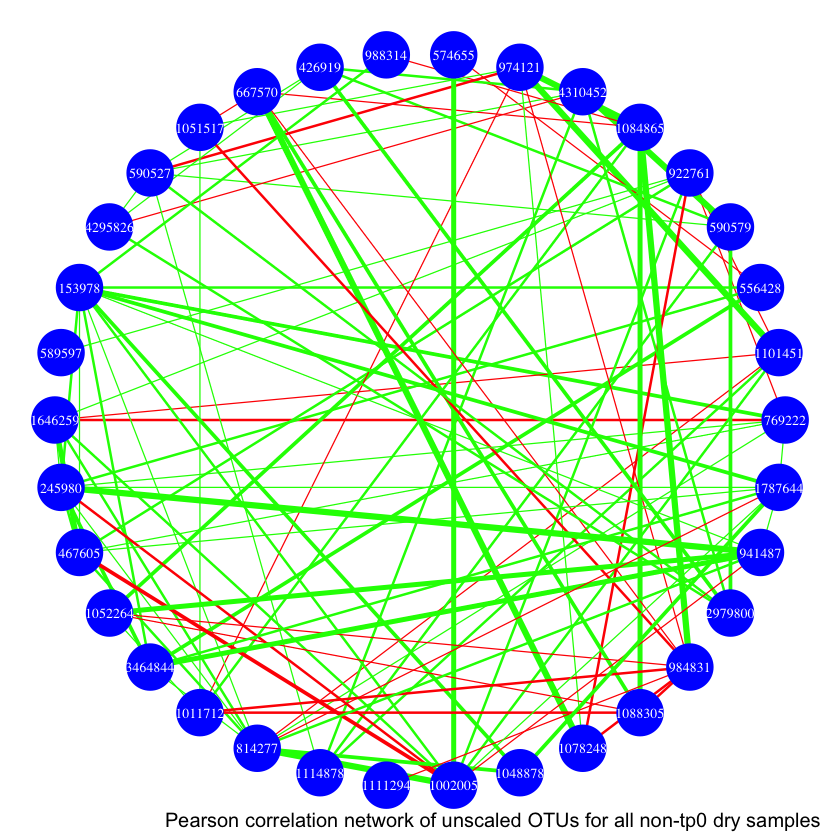

In [36]:
cor_dry_unscaled$r[which(abs(cor_dry_unscaled$r) <= 0.3 & lower.tri(cor_dry_unscaled$r), arr.ind=TRUE)]=0
cor_dry_unscaled$r[which(cor_dry_unscaled$P >= 0.05 & lower.tri(cor_dry_unscaled$r), arr.ind=TRUE)]=0
nw_dry_unscaled <- graph_from_adjacency_matrix(cor_dry_unscaled$r, weighted=T, mode="lower", diag=F)
V(nw_dry_unscaled)$name <- otu_ids_dry_unscaled
E(nw_dry_unscaled)$values <- sig_dry_unscaled
E(nw_dry_unscaled)$color <- ifelse(E(nw_dry_unscaled)$values > 0,'#00FF00','#FF0000')
par(bg="white", mar=c(0,0,0,0))
set.seed(123)
plot(nw_dry_unscaled,
     layout=layout_in_circle,
     vertex.size=13, 
     vertex.label.cex=0.7,
     vertex.color="#0000FF",
     vertex.label.color="white",
     vertex.frame.color="transparent",
     edge.width=as.integer(cut(abs(E(nw_dry_unscaled)$values), breaks = 5)))
text(0.2,-1.1,"Pearson correlation network of unscaled OTUs for all non-tp0 dry samples", col="black")